# Load libraries and data sets

In [2]:
# Load libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
# Load data set "electricity production by fuels"

path = r'/Users/gomula/Documents/Finalproject'
elect_production = pd.read_csv(os.path.join(path, '2 Data set', 'Original', 'nrg_cb_pem_linear.csv','nrg_cb_pem_linear.csv'), index_col=False)
elect_production.head()

,DATAFLOW,LAST UPDATE,freq,siec,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:NRG_CB_PEM(1.0),10/08/22 23:00:00,M,C0000,GWH,AL,2018-01,0.0,NaN
1,ESTAT:NRG_CB_PEM(1.0),10/08/22 23:00:00,M,C0000,GWH,AL,2018-02,0.0,NaN
2,ESTAT:NRG_CB_PEM(1.0),10/08/22 23:00:00,M,C0000,GWH,AL,2018-03,0.0,NaN
3,ESTAT:NRG_CB_PEM(1.0),10/08/22 23:00:00,M,C0000,GWH,AL,2018-04,0.0,NaN
4,ESTAT:NRG_CB_PEM(1.0),10/08/22 23:00:00,M,C0000,GWH,AL,2018-05,0.0,NaN


In [4]:
# remove redundant columns
elect_production.drop(['DATAFLOW', 'LAST UPDATE', 'freq', 'OBS_FLAG', 'unit'], axis=1, inplace=True)

In [5]:
# define the name of columns
elect_production.rename(columns={'geo': 'country-code', 'TIME_PERIOD': 'time-period', 'OBS_VALUE': 'value(GWH)'}, inplace=True)

In [15]:
# define the codes of countries and fuels
country_codes = {'SK':'Slovakia', 'FI':'Finland', 'SE':'Sweden', 'IS':'Iceland','NO':'Norway', 'UK':'United Kingdom',
                 'ME': 'Montenegro','MK':'North Macedonia', 'GE':'Georgia', 'EU27_2020':'European Union - 27 countries (from 2020)', 
                 'AL':'Albania', 'RS':'Serbia', 'TR':'Turkey', 'BA':'Bosnia and Herzegovina', 'MD':'Moldova', 'UA':'Ukraine',  
                 'EA19':'Euro area - 19 countries (from 2015)', 'BE':'Belgium', 'BG':'Bulgaria', 'CZ':'Czechia', 'DK':'Denmark',
                 'DE':'Germany', 'EE':'Estonia', 'IE':'Ireland', 'EL':'Greece', 'ES': 'Spain', 'FR':'France', 'HR':'Croatia',
                 'IT':'Italy', 'CY':'Cyprus', 'LV':'Latvia', 'LT':'Lithuania', 'LU':'Luxembourg', 'HU':'Hungary', 'MT':'Malta',
                 'NL':'Netherlands', 'AT':'Austria', 'PL':'Poland', 'PT':'Portugal', 'RO':'Romania', 'SI':'Slovenia'}
len(country_codes)

41

In [16]:
# define the codes of fuels
fuel_codes = {'TOTAL':'Total', 'CF':'Combustible fuels', 'CF_R':'Combustible fuels - renewable', 'CF_NR':'Combustible fuels - non-renewable',
              'C0000':'Coal and manufactured gases', 'G3000':'Natural gas','O4000XBIO':'Oil and petroleum products (excluding biofuel portion)',
              'RA100':'Hydro', 'RA110':'Pure hydro power', 'RA120':'Mixed hydro power', 'RA130':'Pumped hydro power', 'RA200':'Geothermal',
              'RA300':'Wind', 'RA310':'Wind on shore', 'RA320':'Wind off shore', 'RA400':'Solar', 'RA410':'Solar thermal', 'RA420':'Solar photovoltaic',
              'RA500_5160':'Other renewable energies', 'N9000':'Nuclear fuels and other fuels n.e.c.', 'X9900':'Other fuels n.e.c.'}
fuel_codes

{'TOTAL': 'Total',
 'CF': 'Combustible fuels',
 'CF_R': 'Combustible fuels - renewable',
 'CF_NR': 'Combustible fuels - non-renewable',
 'C0000': 'Coal and manufactured gases',
 'G3000': 'Natural gas',
 'O4000XBIO': 'Oil and petroleum products (excluding biofuel portion)',
 'RA100': 'Hydro',
 'RA110': 'Pure hydro power',
 'RA120': 'Mixed hydro power',
 'RA130': 'Pumped hydro power',
 'RA200': 'Geothermal',
 'RA300': 'Wind',
 'RA310': 'Wind on shore',
 'RA320': 'Wind off shore',
 'RA400': 'Solar',
 'RA410': 'Solar thermal',
 'RA420': 'Solar photovoltaic',
 'RA500_5160': 'Other renewable energies',
 'N9000': 'Nuclear fuels and other fuels n.e.c.',
 'X9900': 'Other fuels n.e.c.'}

In [30]:
elect_production = elect_production[['country','time-period','fuel-type','value(GWH)'  ]]
elect_production.head()

,country,time-period,fuel-type,value(GWH)
0,Albania,2018-01,Coal and manufactured gases,0.0
1,Albania,2018-02,Coal and manufactured gases,0.0
2,Albania,2018-03,Coal and manufactured gases,0.0
3,Albania,2018-04,Coal and manufactured gases,0.0
4,Albania,2018-05,Coal and manufactured gases,0.0


In [31]:
# shape of the dataset
elect_production.shape

(55073, 4)

In [32]:
# data type of attributes
elect_production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55073 entries, 0 to 55072
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      55073 non-null  object 
 1   time-period  55073 non-null  object 
 2   fuel-type    55073 non-null  object 
 3   value(GWH)   54784 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.7+ MB


### There is no null values in 'country', 'time-period' & 'fuel-type', but there is 289 null values in 'value(GWH

In [33]:
# check for mixed data type in df_ords
for col in elect_production.columns.tolist():
  weird = (elect_production[[col]].applymap(type) != elect_production[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (elect_production[weird]) > 0:
    print (col + ' contains mixed data types')
  else:
    print (col + ' doesn\'t contain mixed data types')

country doesn't contain mixed data types
time-period doesn't contain mixed data types
fuel-type doesn't contain mixed data types
value(GWH) doesn't contain mixed data types


In [34]:
# descriptive statistics
elect_production.describe()

,value(GWH)
count,54784.000000
mean,2342.465430
std,12080.625695
min,-2.538000
25%,0.000000
50%,26.535000
75%,662.935000
max,271874.687000


### There are negative values in electricity productions which are not seems to be logical and accurate values

<Axes: ylabel='Frequency'>

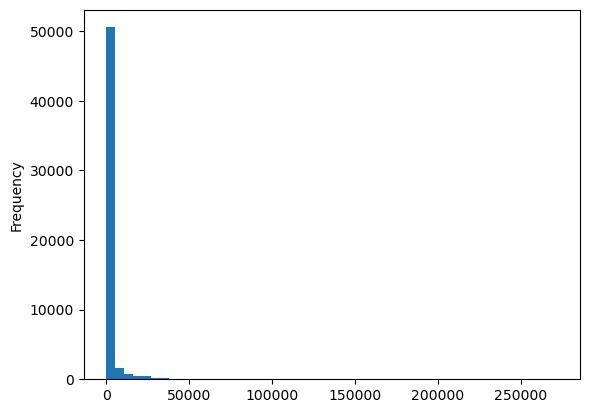

In [35]:
# distribution of values
elect_production['value(GWH)'].plot.hist(bins=50)

There are lots of '0' value in data set. Therefore, we can expect that for many countries or fuel type we will have zero electricity generation.

In [36]:
# value distribution for 'country'
elect_production['country'].value_counts()

Ireland                                      1458
Finland                                      1458
Malta                                        1458
Spain                                        1458
Sweden                                       1458
Luxembourg                                   1437
Austria                                      1437
Slovakia                                     1437
Lithuania                                    1437
Croatia                                      1437
Latvia                                       1437
Hungary                                      1437
North Macedonia                              1437
Norway                                       1437
Poland                                       1437
Portugal                                     1437
Slovenia                                     1437
Romania                                      1437
Serbia                                       1437
Turkey                                       1437


In [38]:
# value distribution for 'fuel-type'
elect_production['fuel-type'].value_counts()

Geothermal                                                2926
Total                                                     2926
Nuclear fuels and other fuels n.e.c.                      2926
Hydro                                                     2926
Wind                                                      2926
Combustible fuels                                         2926
Pumped hydro power                                        2530
Other renewable energies                                  2530
Solar photovoltaic                                        2530
Solar thermal                                             2530
Solar                                                     2530
Other fuels n.e.c.                                        2530
Mixed hydro power                                         2530
Pure hydro power                                          2530
Wind on shore                                             2491
Wind off shore                                         

In [39]:
# remove rows related to 'EU27_2020' & 'EA19' as they are summations for contries in EU and they are not helpful in our analysis
elect_production.drop(elect_production[elect_production['country'].isin(['European Union - 27 countries (from 2020)', 'Euro area - 19 countries (from 2015)'])].index, inplace=True)
set(elect_production['country'])

{'Albania',
 'Austria',
 'Belgium',
 'Bosnia and Herzegovina',
 'Bulgaria',
 'Croatia',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Estonia',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Hungary',
 'Iceland',
 'Ireland',
 'Italy',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Moldova',
 'Montenegro',
 'Netherlands',
 'North Macedonia',
 'Norway',
 'Poland',
 'Portugal',
 'Romania',
 'Serbia',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden',
 'Turkey',
 'Ukraine',
 'United Kingdom'}

In [41]:
# to handle null and negative values in 'value(GWH)' we have decided to replace them with '0'
elect_production.loc[(elect_production['value(GWH)'].isnull() | (elect_production['value(GWH)']<0)), 'value(GWH)'] = 0elect_production[elect_production['value(GWH)'].isnull()]

,country,time-period,fuel-type,value(GWH)
1729,Netherlands,2017-07,Coal and manufactured gases,NaN
9537,Netherlands,2017-07,Combustible fuels - renewable,NaN
11938,Malta,2017-02,Natural gas,NaN
11939,Malta,2017-03,Natural gas,NaN
11940,Malta,2017-04,Natural gas,NaN
...,...,...,...,...
46333,Malta,2022-02,Solar photovoltaic,NaN
46334,Malta,2022-03,Solar photovoltaic,NaN
46335,Malta,2022-04,Solar photovoltaic,NaN
46336,Malta,2022-05,Solar photovoltaic,NaN


In [42]:
# to handle null and negative values in 'value(GWH)' we have decided to replace them with '0'
elect_production.loc[(elect_production['value(GWH)'].isnull() | (elect_production['value(GWH)']<0)), 'value(GWH)'] = 0

In [43]:
# Check for duplicate values
dups = elect_production[elect_production.duplicated()]
dups

,country,time-period,fuel-type,value(GWH)


### There is no duplicated rows

In [44]:
# reset index for new dataset
elect_production.reset_index(inplace=True, drop=True)
elect_production

,country,time-period,fuel-type,value(GWH)
0,Albania,2018-01,Coal and manufactured gases,0.0
1,Albania,2018-02,Coal and manufactured gases,0.0
2,Albania,2018-03,Coal and manufactured gases,0.0
3,Albania,2018-04,Coal and manufactured gases,0.0
4,Albania,2018-05,Coal and manufactured gases,0.0
...,...,...,...,...
52342,United Kingdom,2020-06,Other fuels n.e.c.,0.0
52343,United Kingdom,2020-07,Other fuels n.e.c.,0.0
52344,United Kingdom,2020-08,Other fuels n.e.c.,0.0
52345,United Kingdom,2020-09,Other fuels n.e.c.,0.0


# The final form of the 'elect_production' data frame will be as follow

In [45]:
elect_production.head()

,country,time-period,fuel-type,value(GWH)
0,Albania,2018-01,Coal and manufactured gases,0.0
1,Albania,2018-02,Coal and manufactured gases,0.0
2,Albania,2018-03,Coal and manufactured gases,0.0
3,Albania,2018-04,Coal and manufactured gases,0.0
4,Albania,2018-05,Coal and manufactured gases,0.0


In [46]:
elect_production.shape

(52347, 4)

In [47]:
elect_production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52347 entries, 0 to 52346
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      52347 non-null  object 
 1   time-period  52347 non-null  object 
 2   fuel-type    52347 non-null  object 
 3   value(GWH)   52347 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.6+ MB


In [48]:
elect_production.describe()


,value(GWH)
count,52347.000000
mean,1128.672927
std,3918.406778
min,0.000000
25%,0.000000
50%,16.895000
75%,472.303000
max,57338.858000


<Axes: ylabel='Frequency'>

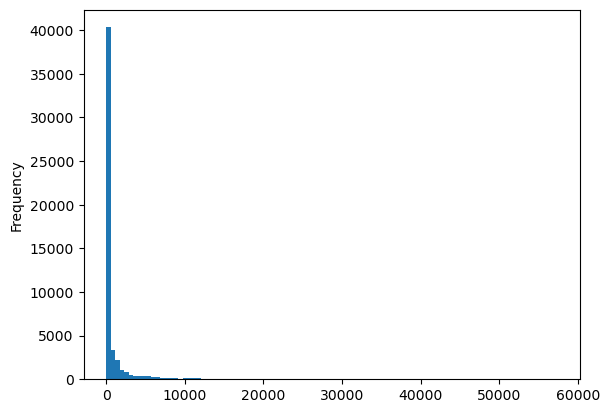

In [49]:
elect_production['value(GWH)'].plot.hist(bins = 100)

In [50]:
# Save data set in pickle and csv formats
elect_production.to_csv(os.path.join(path, '2 Data set', 'Modified', 'elect_production.csv'))
elect_production.to_pickle(os.path.join(path, '2 Data set', 'Modified', 'elect_production.pkl'))